In [16]:
!pip install numpy pandas librosa tensorflow keras matplotlib

In [1]:
import os
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Flatten, Dropout
from tensorflow.keras.layers import Input

def load_data(data_directory, max_length=None):
    X = []
    y = []
    labels = []
    
    for label in os.listdir(data_directory):
        label_dir = os.path.join(data_directory, label)
        if os.path.isdir(label_dir):
            labels.append(label)
            for file in os.listdir(label_dir):
                file_path = os.path.join(label_dir, file)
                audio, sr = librosa.load(file_path, sr=None)
                # Calculate MFCCs
                mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
                X.append(mfccs.T)  # Transpose to shape (time, n_mfcc)
                y.append(labels.index(label))
    
    # Pad sequences to the same length if max_length is defined
    if max_length is not None:
        X = pad_sequences(X, maxlen=max_length, padding='post', dtype='float32', truncating='post')
    else:
        # If not padding, convert to a numpy array directly
        X = np.array(X, dtype=object)  # Keep as an array of objects if no padding
    
    return X, np.array(y), labels

# Define a maximum length for padding, e.g., 300
max_length = 300

# Load data
X, y, labels = load_data('C:/Users/Vimal MR/Documents/Animal Sound Classification - Final Year Project/data', max_length)


In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_padded = pad_sequences(X_train, padding='post', dtype='float32')
X_test_padded = pad_sequences(X_test, padding='post', dtype='float32')

In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad sequences
X_padded = pad_sequences(X, padding='post', dtype='float32')


In [4]:
# Define the model
model = Sequential()
model.add(Input(shape=(X_padded.shape[1], X_padded.shape[2])))
# Temporal Convolutional Network Layer
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Dropout(0.5))
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Dropout(0.5))
# Recurrent Layer
model.add(LSTM(128, return_sequences=True))
model.add(Flatten())
model.add(Dense(len(labels), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [5]:
# Train the model
history = model.fit(X_train_padded, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 328ms/step - accuracy: 0.5396 - loss: 0.8123 - val_accuracy: 0.6719 - val_loss: 0.8663
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 267ms/step - accuracy: 0.7094 - loss: 0.6961 - val_accuracy: 0.6719 - val_loss: 0.5536
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 262ms/step - accuracy: 0.7992 - loss: 0.4964 - val_accuracy: 0.7656 - val_loss: 0.4921
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 264ms/step - accuracy: 0.8255 - loss: 0.4584 - val_accuracy: 0.7969 - val_loss: 0.5200
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 252ms/step - accuracy: 0.7721 - loss: 0.5238 - val_accuracy: 0.8125 - val_loss: 0.6550
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 248ms/step - accuracy: 0.7773 - loss: 0.6862 - val_accuracy: 0.8125 - val_loss: 0.5867
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 262ms/step - accuracy: 0.8780 - loss: 0.3612 - val_accuracy: 0.6875 - val_loss: 0.9383
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 260ms/step - accuracy: 0.8512 - loss: 0.4230 - val_accuracy: 0.7969 - val_loss:

In [6]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test)
print(f"Accuracy: {test_accuracy * 100:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.9187 - loss: 0.6528
Accuracy: 90.00%


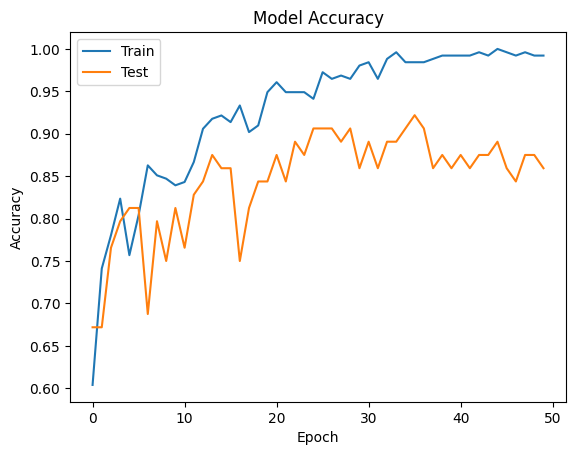

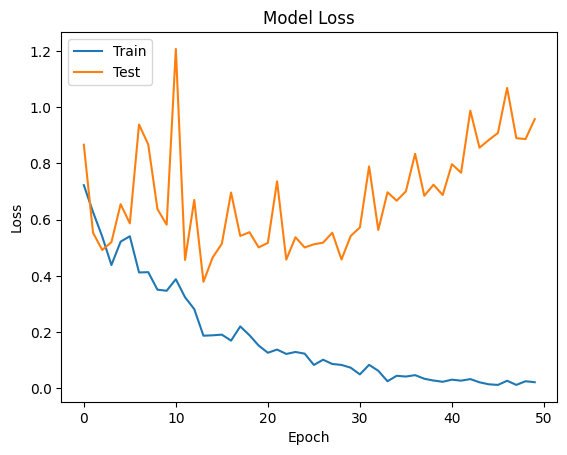

In [7]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [8]:
from sklearn.metrics import classification_report
import numpy as np

# Step 1: Make predictions on the test dataset
y_pred = model.predict(X_test_padded)

# Step 2: Convert predictions to class labels
# y_pred is an array of probabilities; we need the index of the maximum probability as the class label
y_pred_classes = np.argmax(y_pred, axis=1)

# Step 3: Generate the classification report
report = classification_report(y_test, y_pred_classes, target_names=labels)

# Print the classification report
print("Classification Report:\n", report)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step
Classification Report:
               precision    recall  f1-score   support

         Cat       0.95      0.87      0.91        46
         Dog       0.84      0.94      0.89        34

    accuracy                           0.90        80
   macro avg       0.90      0.91      0.90        80
weighted avg       0.91      0.90      0.90        80

